<a href="https://colab.research.google.com/github/bharathmb7/eBPF-project/blob/main/lstm-gru-alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


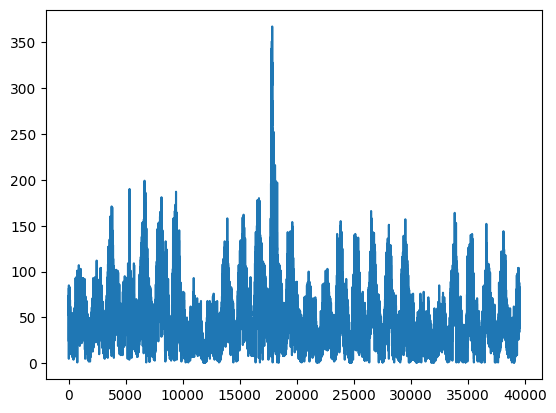

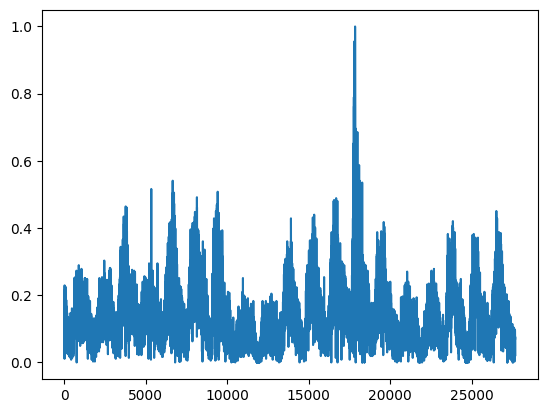

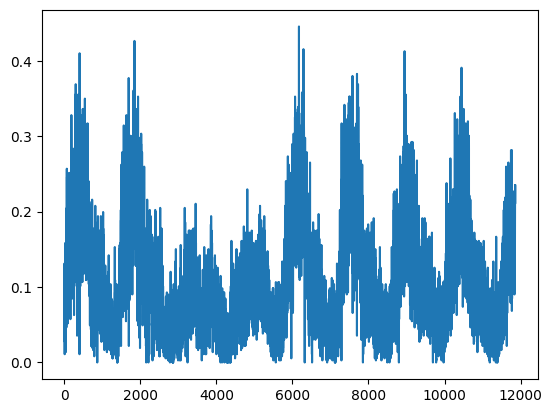

[[0.06557377 0.11202186 0.19945355 0.14754098 0.19945355 0.15300546
  0.15300546 0.13934426 0.17486339 0.11748634 0.12568306 0.1557377
  0.19398907 0.12021858 0.1010929 ]
 [0.11202186 0.19945355 0.14754098 0.19945355 0.15300546 0.15300546
  0.13934426 0.17486339 0.11748634 0.12568306 0.1557377  0.19398907
  0.12021858 0.1010929  0.01092896]
 [0.19945355 0.14754098 0.19945355 0.15300546 0.15300546 0.13934426
  0.17486339 0.11748634 0.12568306 0.1557377  0.19398907 0.12021858
  0.1010929  0.01092896 0.11202186]
 [0.14754098 0.19945355 0.15300546 0.15300546 0.13934426 0.17486339
  0.11748634 0.12568306 0.1557377  0.19398907 0.12021858 0.1010929
  0.01092896 0.11202186 0.20765027]
 [0.19945355 0.15300546 0.15300546 0.13934426 0.17486339 0.11748634
  0.12568306 0.1557377  0.19398907 0.12021858 0.1010929  0.01092896
  0.11202186 0.20765027 0.13661202]]
[0.01092896 0.11202186 0.20765027 0.13661202 0.19125683]


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import *
from tensorflow.keras import layers, regularizers, models
dataset = pd.read_csv('/content/drive/MyDrive/aggregated_data.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
plt.plot(train)
plt.show()



plt.plot(test)
plt.show()



# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#valX, valY = create_dataset(val, look_back)
print(trainX[:5])
print(trainY[:5])
#print(valX[:5])


In [3]:

# reshape input to be [samples, time steps, features]

trainX = trainX.reshape( (trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape( (testX.shape[0],trainX.shape[1], 1))
#testY=testY.reshape((trainY.shape[1],trainY.shape[0]))
#valX = valX.reshape( (valX.shape[0],valX.shape[1], 1))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
#print(valX.shape)

(27654, 15, 1)
(27654,)
(11843, 15, 1)
(11843,)


In [4]:
# define model
# create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(trainX.shape[1],trainX.shape[2] )))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# model.summary()

# model2 = Sequential()
# model2.add(Bidirectional(GRU(64, activation='relu'), input_shape=(trainX.shape[1], trainX.shape[2])))
# model2.add(Dropout(0.5))
# model2.add(Dense(1))

# model2.compile(optimizer='adam', loss='mse')

# model2.summary()


# model4 = Sequential()
# model4.add(InputLayer((trainX.shape[1],trainX.shape[2])))
# model4.add(GRU(64))
# model4.add(Dense(8, 'relu'))
# model4.add(Dense(1, 'linear'))
# model4.compile(optimizer='adam',loss='mse')

# model4.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import SGD

# # Define the model architecture
# model = Sequential()
# model.add(InputLayer(input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(GRU(32, return_sequences=True))
# model.add(LSTM(32))
# model.add(Dense(8, activation='linear'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')



# model = models.Sequential([
#     layers.Bidirectional(layers.GRU(units=32, activation='relu', return_sequences=True),
#                           input_shape=(trainX.shape[1], trainX.shape[2])),
#      layers.add(Dropout(0.5))
#      layers.add(CNN)
#     layers.Dense(units=1, activation='relu', kernel_regularizer=regularizers.l2(0.01))
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')
model = Sequential()
model.add(InputLayer(input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(15, return_sequences=True))
model.add(GRU(15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
# model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=0, validation_data=(testX, testY))

# Fit the model to the training data
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 15)            1020      
                                                                 
 gru (GRU)                   (None, 15)                1440      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 2476 (9.67 KB)
Trainable params: 2476 (9.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.fit(trainX, trainY, epochs=50, batch_size=64,verbose=1, validation_data=(testX, testY))

Epoch 1/50
433/433 [==============================] - 14s 23ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 2/50
433/433 [==============================] - 9s 20ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/50
433/433 [==============================] - 7s 16ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/50
433/433 [==============================] - 8s 20ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/50
433/433 [==============================] - 8s 18ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 6/50
433/433 [==============================] - 8s 19ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/50
433/433 [==============================] - 8s 19ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 8/50
433/433 [==============================] - 8s 18ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/50
433/433 [==============================] - 8s 19ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
433/433 [==============================] - 8s 17ms/step - loss: 0.0019 - val_l

In [7]:
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=0)

# from keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# model2.fit( trainX, trainY,validation_data=(valX, valY), epochs=15, callbacks=[early_stop])


KeyboardInterrupt: 

In [ ]:
# fit model
model4.fit(trainX, trainY, epochs=10, batch_size=10, verbose=0)


In [9]:
# make predictions
import time
trainPredict = model.predict(trainX)
start_time = time.time()
testPredict = model.predict(testX)
end_time = time.time()
print(trainPredict.shape)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

371/371 [==============================] - 2s 5ms/step
(27654, 1)


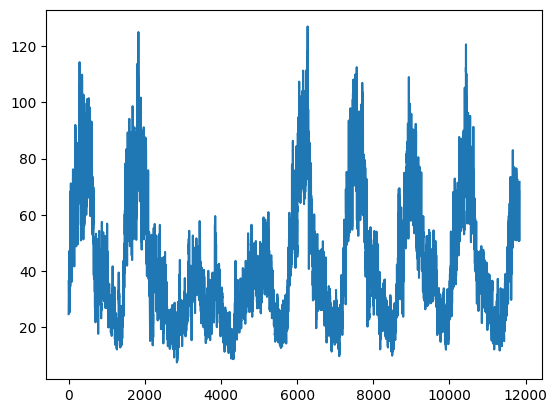

In [10]:


plt.plot(testPredict)
plt.show()




Train Score: 16.09 RMSE
Test Score: 14.41 RMSE
Time taken for prediction: 2.64 seconds


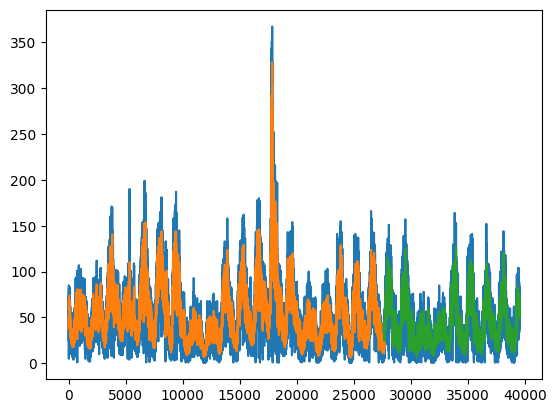

In [11]:
from sklearn.metrics import mean_squared_error
#  calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



print('Time taken for prediction: {:.2f} seconds'.format(end_time - start_time))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [12]:
from tensorflow.keras.models import load_model

saved_model = load_model('path_to_saved_model')
# Example input data
input_data = [1 2 3 4 5 6 7 8 9 10]

# Make predictions using the loaded model
predictions = saved_model.predict(input_data)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-12-b3352c7978e4>, line 5)

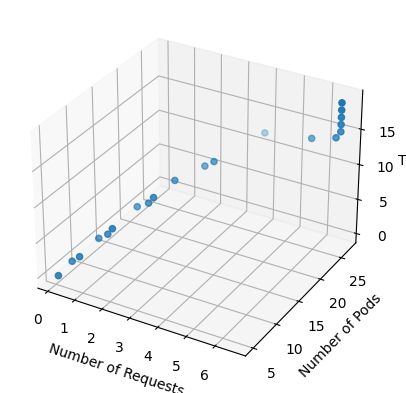

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from io import StringIO  # Correct import for StringIO

# Sample data
data = """
15:39:47 102526 5
15:40:07 239597 7
15:40:27 526075 7
15:40:47 681773 10
15:41:07 1024130 10
15:41:27 1200679 10
15:41:47 1394645 14
15:42:07 1815428 14
15:42:28 2001189 14
15:42:48 2256506 17
15:43:08 2842718 20
15:43:28 3174001 20
15:43:48 3879112 27
15:44:09 5558239 27
15:44:29 6409920 27
15:44:49 6567483 27
15:45:09 6567483 27
15:45:29 6567483 27
15:45:49 6567483 27
15:46:09 6567483 27
"""

# Convert the data to a Pandas DataFrame
df = pd.read_csv(StringIO(data), sep='\s+', header=None)
df.columns = ['Time', 'Requests', 'Pods']

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Requests'], df['Pods'], range(len(df)))

# Setting labels
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Number of Pods')
ax.set_zlabel('Time')

plt.show()


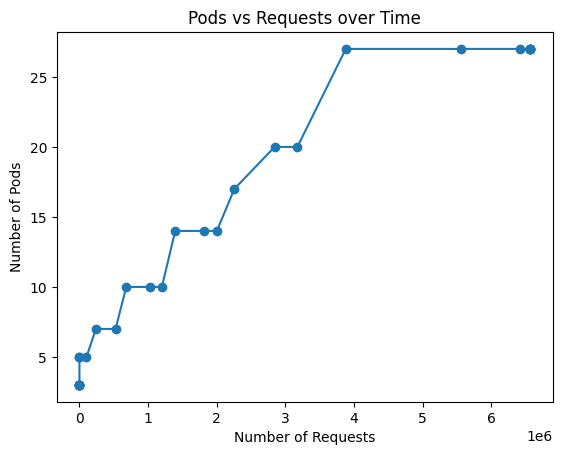

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Sample data
data = """
12:52:56	0	3
12:53:16	0	3
12:53:36	0	3
12:53:56	0	3
12:54:16	0	3
12:54:36	0	3
15:39:07	0	5
15:39:27	0	5
15:39:47	102526	5
15:40:07	239597	7
15:40:27	526075	7
15:40:47	681773	10
15:41:07	1024130	10
15:41:27	1200679	10
15:41:47	1394645	14
15:42:07	1815428	14
15:42:28	2001189	14
15:42:48	2256506	17
15:43:08	2842718	20
15:43:28	3174001	20
15:43:48	3879112	27
15:44:09	5558239	27
15:44:29	6409920	27
15:44:49	6567483	27
15:45:09	6567483	27
15:45:29	6567483	27
15:45:49	6567483	27
15:46:09	6567483	27

"""

# Convert the data to a Pandas DataFrame
df = pd.read_csv(StringIO(data), sep='\s+', header=None)
df.columns = ['Time', 'Requests', 'Pods']

# Plotting a line graph
plt.plot(df['Requests'], df['Pods'], marker='o', linestyle='-')

# Setting labels
plt.xlabel('Number of Requests')
plt.ylabel('Number of Pods')
plt.title('Pods vs Requests over Time')

plt.show()


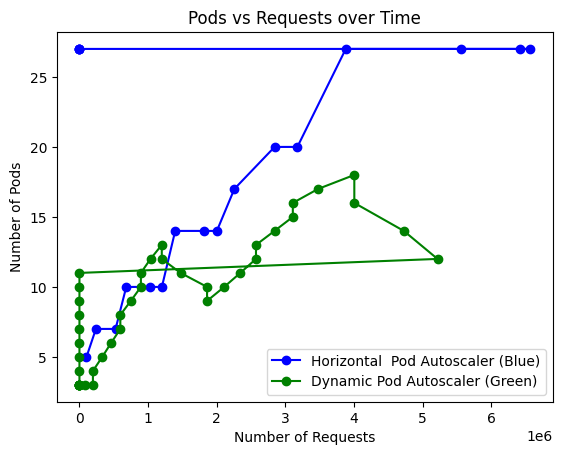

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# First dataset (blue color)
data1 = """
15:39:47 102526 5
15:40:07 239597 7
15:40:27 526075 7
15:40:47 681773 10
15:41:07 1024130 10
15:41:27 1200679 10
15:41:47 1394645 14
15:42:07 1815428 14
15:42:28 2001189 14
15:42:48 2256506 17
15:43:08 2842718 20
15:43:28 3174001 20
15:43:48 3879112 27
15:44:09 5558239 27
15:44:29 6409920 27
15:44:49 6567483 27
15:45:09 0 27
15:45:29 0 27
15:45:49 0 27
15:46:09 0 27
"""

# Second dataset (green color)
data2 = """
15:25:26 0 3
15:25:36 0 3
15:25:46 78774 3
15:25:57 196080 3
15:26:07 196080 4
15:26:17 331767 5
15:26:27 461474 6
15:26:38 595432 7
15:26:48 595432 8
15:26:58 748016 9
15:27:09 894943 10
15:27:19 894943 11
15:27:29 1035025 12
15:27:40 1199136 13
15:27:50 1199136 12
15:28:01 1473677 11
15:28:11 1858695 10
15:28:21 1858695 9
15:28:32 2107906 10
15:28:42 2343154 11
15:28:53 2571118 12
15:29:03 2571118 13
15:29:13 2840982 14
15:29:24 3107759 15
15:29:34 3107759 16
15:29:45 3476234 17
15:29:56 4003494 18
15:30:06 4003494 16
15:30:17 4724750 14
15:30:27 5215331 12
15:30:38 0 11
15:30:48 0 10
15:30:58 0 9
15:31:08 0 8
15:31:18 0 7
15:31:29 0 6
15:31:39 0 5
15:31:49 0 4
15:31:59 0 3
15:32:10 0 3
15:32:20 0 3
15:32:30 0 3
15:32:40 0 3
"""

# Convert data to Pandas DataFrames
df1 = pd.read_csv(StringIO(data1), sep='\s+', header=None)
df1.columns = ['Time', 'Requests', 'Pods']

df2 = pd.read_csv(StringIO(data2), sep='\s+', header=None)
df2.columns = ['Time', 'Requests', 'Pods']

# Plotting
plt.plot(df1['Requests'], df1['Pods'], label='Horizontal  Pod Autoscaler (Blue)', color='blue', marker='o', linestyle='-')
plt.plot(df2['Requests'], df2['Pods'], label='Dynamic Pod Autoscaler (Green)', color='green', marker='o', linestyle='-')

# Setting labels and legend
plt.xlabel('Number of Requests')
plt.ylabel('Number of Pods')
plt.title('Pods vs Requests over Time')
plt.legend()

plt.show()
# fig, ax1 = plt.subplots()
# ax1.plot(df1['Time'], df1['Pods'], label='Horizontal Pod Autoscaler (Blue)', color='blue', marker='o', linestyle='-')
# ax1.plot(df2['Time'], df2['Pods'], label='Dynamic Pod Autoscaler (Green)', color='green', marker='o', linestyle='-')

# # Set labels and title for the first y-axis
# ax1.set_xlabel('Time (minutes)')
# ax1.set_ylabel('Number of Pods')
# ax1.set_title('Pod Allocation and Workload over Time')
# ax1.legend()

# # Create a second y-axis for requests
# ax2 = ax1.twinx()
# ax2.plot(df1['Time'], df1['Requests'], label='Number of Requests', color='orange', linestyle='--')
# ax2.plot(df2['Time'], df2['Requests'], label='Number of Requests', color='orange', linestyle='--')

# # Set label for the second y-axis
# ax2.set_ylabel('Number of Requests', color='orange')

# plt.show()

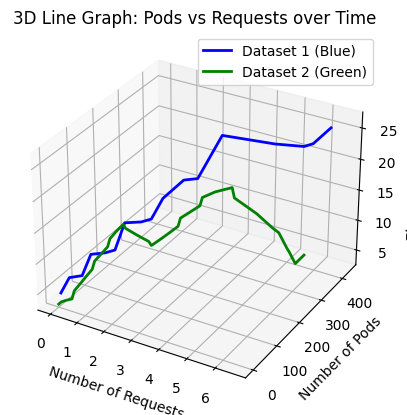

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from io import StringIO

# First dataset (blue color)
data1 = """
15:39:47 102526 5
15:40:07 239597 7
15:40:27 526075 7
15:40:47 681773 10
15:41:07 1024130 10
15:41:27 1200679 10
15:41:47 1394645 14
15:42:07 1815428 14
15:42:28 2001189 14
15:42:48 2256506 17
15:43:08 2842718 20
15:43:28 3174001 20
15:43:48 3879112 27
15:44:09 5558239 27
15:44:29 6409920 27
15:44:49 6567483 27
15:45:09 6567483 27
15:45:29 6567483 27
15:45:49 6567483 27
15:46:09 6567483 27
"""

# Second dataset (green color)
data2 = """
15:25:26 0 3
15:25:36 0 3
15:25:46 78774 3
15:25:57 196080 3
15:26:07 196080 4
15:26:17 331767 5
15:26:27 461474 6
15:26:38 595432 7
15:26:48 595432 8
15:26:58 748016 9
15:27:09 894943 10
15:27:19 894943 11
15:27:29 1035025 12
15:27:40 1199136 13
15:27:50 1199136 12
15:28:01 1473677 11
15:28:11 1858695 10
15:28:21 1858695 9
15:28:32 2107906 10
15:28:42 2343154 11
15:28:53 2571118 12
15:29:03 2571118 13
15:29:13 2840982 14
15:29:24 3107759 15
15:29:34 3107759 16
15:29:45 3476234 17
15:29:56 4003494 18
15:30:06 4003494 16
15:30:17 4724750 14
15:30:27 5215331 12
15:30:38 5368971 11
15:30:48 5368971 10
15:30:58 5368971 9
15:31:08 5368971 8
15:31:18 5368971 7
15:31:29 5368971 6
15:31:39 5368971 5
15:31:49 5368971 4
15:31:59 5368971 3
15:32:10 5368971 3
15:32:20 5368971 3
15:32:30 5368971 3
15:32:40 5368971 3
"""

# Convert data to Pandas DataFrames
df1 = pd.read_csv(StringIO(data1), sep='\s+', header=None, parse_dates=[0], infer_datetime_format=True)
df1.columns = ['Time', 'Requests', 'Pods']

df2 = pd.read_csv(StringIO(data2), sep='\s+', header=None, parse_dates=[0], infer_datetime_format=True)
df2.columns = ['Time', 'Requests', 'Pods']

# Convert time to elapsed seconds
df1['Elapsed Time'] = (df1['Time'] - df1['Time'].min()).dt.total_seconds()
df2['Elapsed Time'] = (df2['Time'] - df2['Time'].min()).dt.total_seconds()

# Plotting 3D line graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df1['Requests'], df1['Elapsed Time'],  df1['Pods'],label='Dataset 1 (Blue)', color='blue', linewidth=2)
ax.plot(df2['Requests'],  df2['Elapsed Time'],df2['Pods'], label='Dataset 2 (Green)', color='green', linewidth=2)

# Setting labels and legend
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Number of Pods')
ax.set_zlabel('Elapsed Time (s)')
ax.set_title('3D Line Graph: Pods vs Requests over Time')
ax.legend()

plt.show()
